### Libraries

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from copy import deepcopy
import numpy as np
import folium
import json


### Load du Dataset


In [103]:
df2021 = pd.read_csv('valeursfoncieres-2021.txt', sep = '|')

C:\Users\samue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,23,24,25,26,27,28,29,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
df2021

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,866.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,168.0,5.0,S,NaN,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/03/2021,Vente,...,NaN,2,2.0,Appartement,NaN,30.0,2.0,NaN,NaN,NaN
3379228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/03/2021,Vente,...,NaN,2,2.0,Appartement,NaN,37.0,2.0,NaN,NaN,NaN
3379229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3379230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/03/2021,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


### Cleaning du Dataset
On observe que le Dataset comporte beaucoup de donnee manquante qu'il faut donc supprimer

On commence par supprimer les colonnes qui ne ne nous intéressent pas 

In [105]:
del df2021['Code type local']
del df2021['No disposition']
del df2021['Type de voie']
del df2021['No voie']
del df2021['Code voie']
del df2021['Nombre pieces principales']
del df2021['No plan']
del df2021['Code postal']
del df2021['Voie']
del df2021['Nombre de lots']

#### Les NaN
En étudiant les données on observe que certaines colonnes se composent majoritairement de NaN. On fait donc le choix de supprimer la colonne quand elle contient plus de la moitié de NaN c'est a dire 1500000. On va donc supprimer toutes ces lignes


In [106]:
allNA = df2021.isna().sum()
for i in allNA.index:
  if allNA[i] >= 1500000:
    del df2021[i]

In [107]:
df2021 = df2021[df2021['Commune'].notna()]

#### Les types de données 

'Valeur Vonciere' n'est pas du bon type. C'est une colonne de String on la passe donc en Float. De plus, il manque des valeurs, pour ne pas pertuber les futurs graphiques on comble les NaN par la valeur moyenne de la valeur foncière.

In [108]:
df2021["Valeur fonciere"] = df2021["Valeur fonciere"].str.replace(',','.').astype(float)

In [109]:
vf = df2021['Valeur fonciere'].mean()

In [110]:
df2021['Valeur fonciere'] = df2021['Valeur fonciere'].replace(np.nan, vf)

De la meme manière, que pour la valeur foncière on observe qu'il y a une majorité de variable 'Nature culture' de type String. On comble donc les NaN par des S.


In [111]:
df2021['Nature culture'] = df2021['Nature culture'].replace(np.nan, 'S')

Dans la colonne section on remplace les lignes vides par une valeur random. En effet, les valeurs étant qualitatives, on ne peut pas remplacer la valeur vide par la moyenne des valeurs existantes. De fait, pour ne pas perturber la moyenne et l'écart-type, on remplace les nan par des valeurs aléatoires.

In [112]:
lSec = df2021['Section'].value_counts()
df2021['Section'] = df2021['Section'].replace(np.nan, random.choice(lSec))

Etant donné que les départements Corse ont des codes contenant des lettres, on modifie leur valeur afin de pouvoir les traiter quantitativement comme les autres codes postaux.

In [113]:
df2021['Code departement'] = df2021['Code departement'].replace('2A', 2.1)
df2021['Code departement'] = df2021['Code departement'].replace('2B', 2.2)

In [114]:
df2021

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code commune,Section,Type local,Surface reelle bati,Nature culture,Surface terrain
0,05/01/2021,Vente,185000.0,VAL-REVERMONT,1,426,ZC,Maison,97.0,S,2410.0
1,05/01/2021,Vente,185000.0,VAL-REVERMONT,1,426,ZC,Dépendance,0.0,S,2410.0
2,06/01/2021,Vente,10.0,BEY,1,42,A,NaN,NaN,BT,530.0
3,04/01/2021,Vente,204332.0,BUELLAS,1,65,B,Maison,88.0,S,866.0
4,06/01/2021,Vente,320000.0,MONTAGNAT,1,254,AZ,Maison,168.0,S,1426.0
...,...,...,...,...,...,...,...,...,...,...,...
3379227,12/03/2021,Vente,383000.0,PARIS 04,75,104,AO,Appartement,30.0,S,NaN
3379228,17/03/2021,Vente,260000.0,PARIS 02,75,102,AP,Appartement,37.0,S,NaN
3379229,19/03/2021,Vente,38000.0,PARIS 04,75,104,AH,Dépendance,0.0,S,NaN
3379230,30/03/2021,Vente,38000.0,PARIS 04,75,104,AP,Dépendance,0.0,S,NaN


On modifie la colonne 'Date mutation'. Le format initial de la date est JJ/MM/AAAA. Afin de faciliter l'utilisation des différentes librairies dans la suite du code, on modifie ce format en MM/JJ/AAAA

In [115]:
dateF = []
for i in df2021.index:
    date = df2021['Date mutation'][i].split('/')
    cur = date[1]+"/" + date[0] + "/" + date[2]
    dateF.append(cur)
df2021['Date MM/JJ/AAAA'] = dateF
#del df2021['Date mutation']

On retire de la dataFrame les lignes dont la colonne 'Surface Terrain' est nulle.

In [116]:
index = df2021['Surface terrain'].index[df2021['Surface terrain'].apply(np.isnan)]

In [117]:
df2021 = df2021.drop(index)

Maintenant que notre dataframe est propre, on verifie qu'il ne reste aucune ligne d'importance dont l'object est nul.

In [118]:
empty = []
for i in range(970,990):
    empty.append(i)

df2021 = df2021[df2021['Code departement'].isin(empty) == False]

In [119]:
NA = df2021.isna().sum()
NA

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Commune                      0
Code departement             0
Code commune                 0
Section                      0
Type local             1178006
Surface reelle bati    1179768
Nature culture               0
Surface terrain              0
Date MM/JJ/AAAA              0
dtype: int64

Puisque notre donnée est propre, on l'exporte en csv pour pouvoir la réutiliser

In [120]:
df2021.to_csv('data_clean.csv', index=False)

### Analyse des données

In [121]:
df2021 = pd.read_csv('data_clean.csv')

## Toute la France

Nous representons ici les type de contrats et leur récurance sur l'année 2021. On constate que plus de 50% represente des ventes.

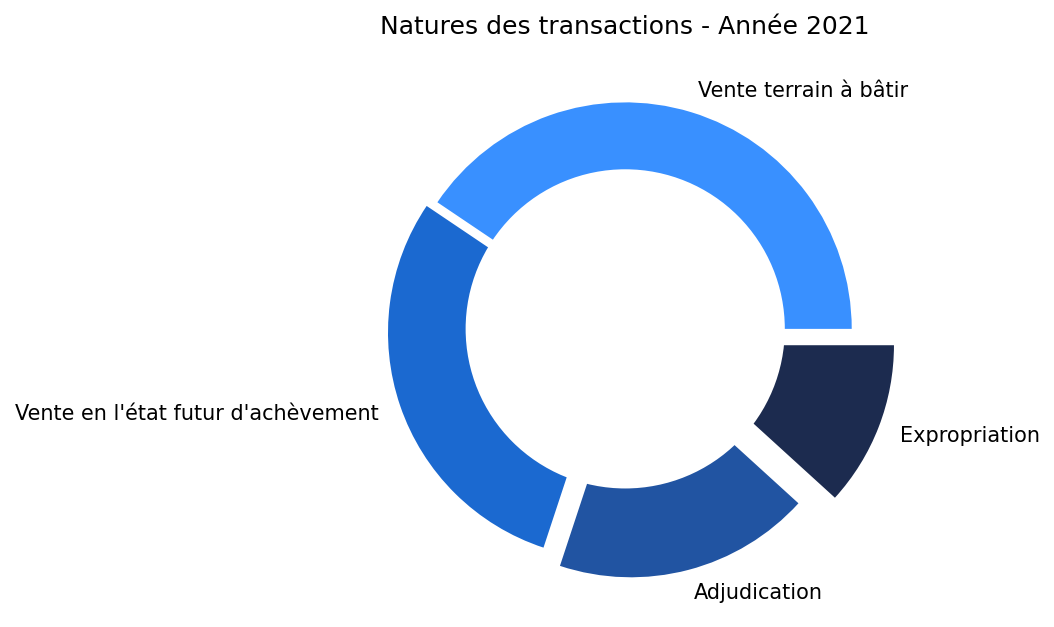

In [122]:
mut = df2021['Nature mutation'].value_counts().tail(4)
x = mut.index.tolist()
y = mut.tolist()
explode = [0, 0.05, 0.1, 0.2]  
mycolors = ["#3990ff", "#1b69d0", "#2154a2", "#1c2b4f"]
plt.pie(y, labels = x, explode = explode, colors = mycolors)
plt.title("Natures des transactions - Année 2021")

# Add a circle at the center to transform it in a donut chart
circPlot=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circPlot)

plt.show()

Nous cherchons a savoir si il existe une sensibilité de marché a un certain moment de l'année. En observant le graphique suivant nous pouvons voir que l'offre augmente en hiver alors qu'elle descend en été. Par consequence le meilleur moment pour investir est l'hiver et le pîre l'été.

No handles with labels found to put in legend.


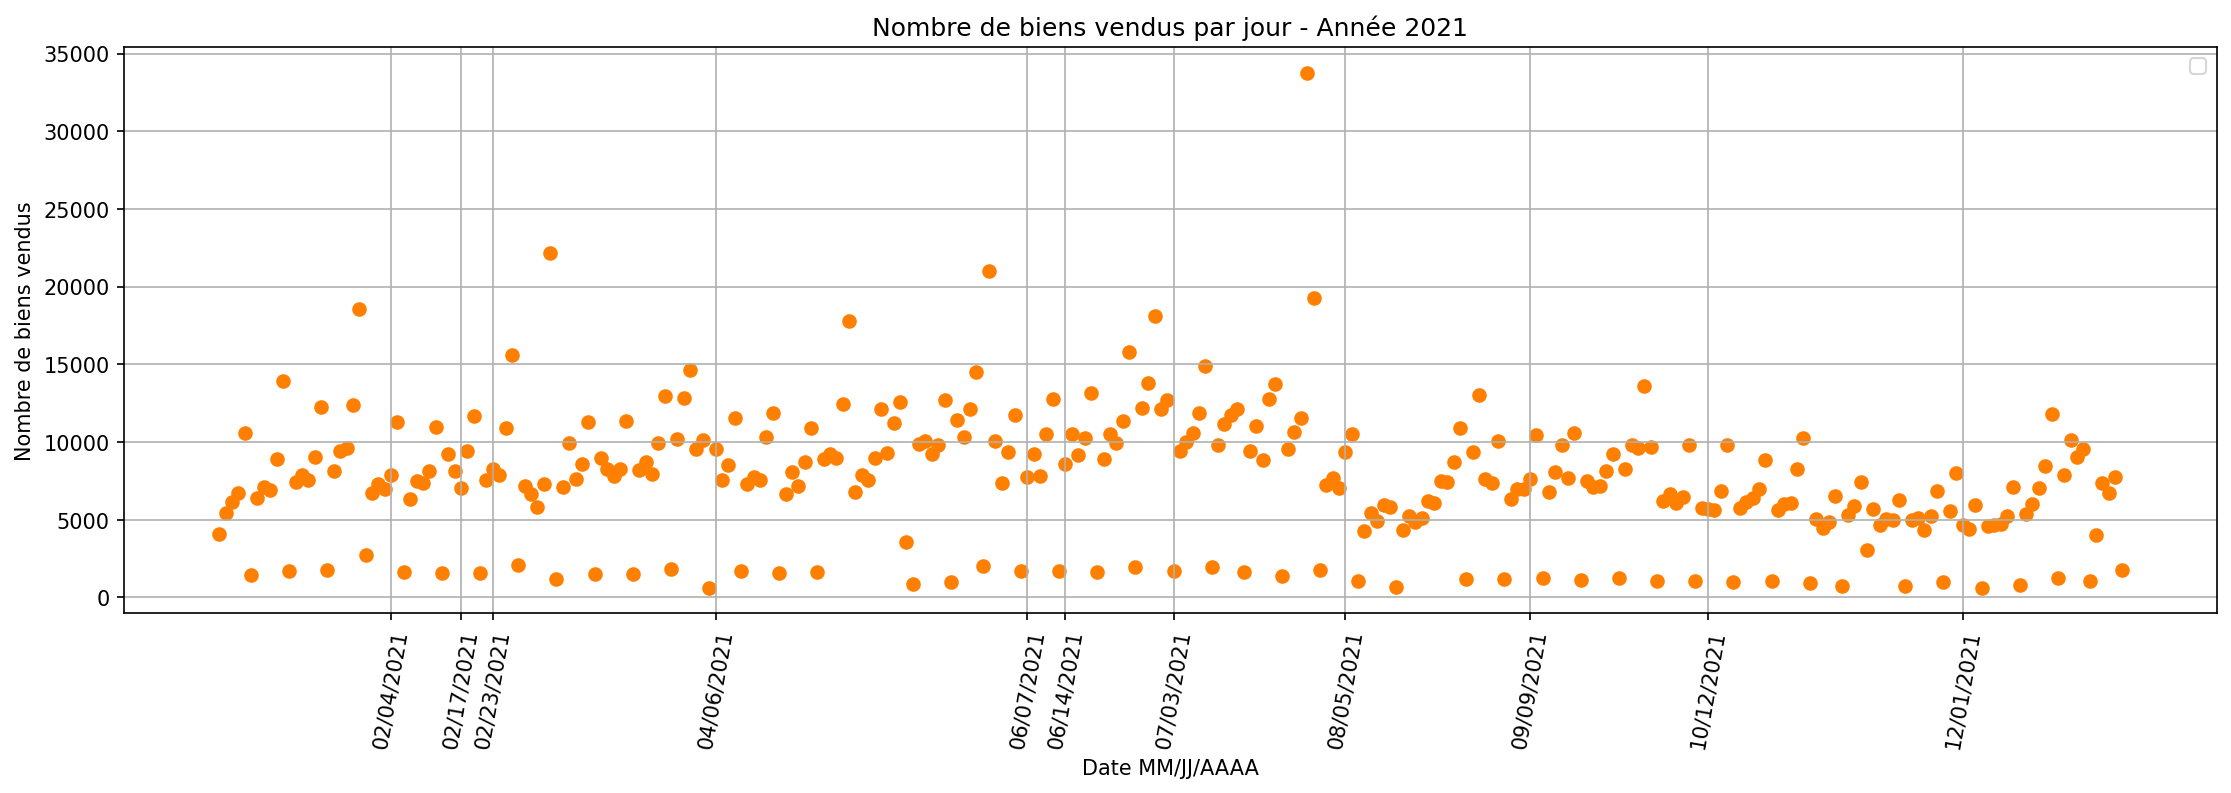

In [123]:
#Quels sont les mois où l'immobilier se porte le mieux ?
df = df2021['Date MM/JJ/AAAA'].value_counts().sort_values(ascending = False).head(300)
df = df.sort_index()
x = df.index.tolist()
y = df.tolist()

plt.grid(True)
plt.scatter(x, y, c = '#ff7f00')

mean_x = ['02/04/2021','02/17/2021','02/23/2021','04/06/2021','06/07/2021','06/14/2021','07/03/2021','08/05/2021', '09/09/2021','10/12/2021','12/01/2021']

plt.title('Nombre de biens vendus par jour - Année 2021')
plt.xticks(ticks = mean_x, rotation=80)
plt.xlabel("Date MM/JJ/AAAA")
plt.ylabel('Nombre de biens vendus')
plt.legend()
plt.show()

On cherche a représenter le nombre de biens vendus par departement directement sur la carte de la France. On Observe une forte augmentation des achats dans la diagonale du vide. cela s'explique par une population en forte ruralisation. La population cherche a revenir vers la campagne en cette période d'épidémie.  

In [124]:
import geopandas as gpd

In [125]:
geoData = gpd.read_file("datageojson.geojson")
# Merge the clean_dvf_2020 dataset with the geospatial information
df = pd.DataFrame(df2021.groupby(['Code departement']).size())


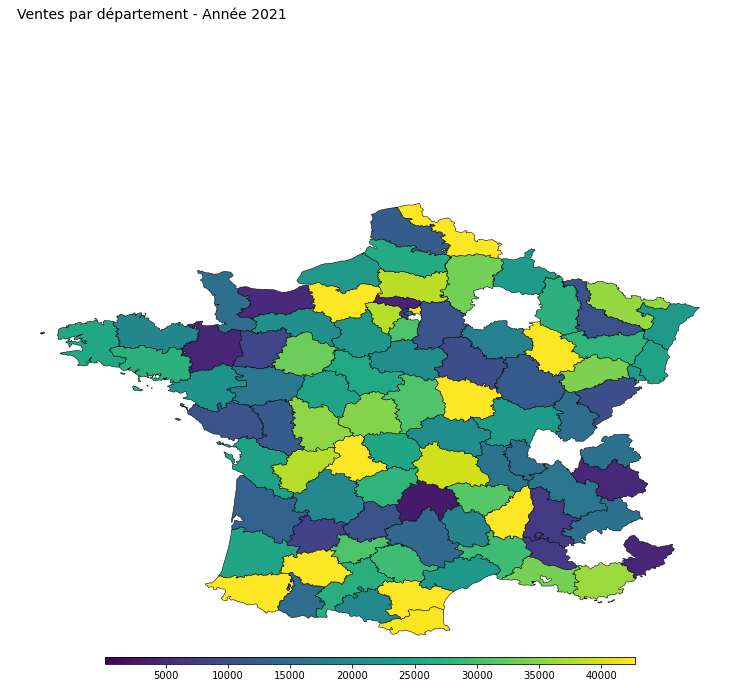

In [83]:
# Load file
geoData = gpd.read_file("datageojson.geojson")
# Merge the clean_dvf_2020 dataset with the geospatial information
df = pd.DataFrame(df2021.groupby(['Code departement']).size())
geoData = geoData.loc[geoData['code'] != '2A']
geoData = geoData.loc[geoData['code'] != '2B']
geoData['Code departement'] = geoData['code'].astype(float)
geoData = geoData.drop(['code'], axis = 1)
geoData.set_index('Code departement').sort_index()
df = df.drop([2.1, 2.2, 1.0], axis = 0)
geoData = geoData.drop([20.0, 57.0, 67.0, 68.0], axis = 0)
geoData["Nombre ventes"] = df[0].tolist()

fig, ax = plt.subplots(1, figsize=(13, 13))

# map departement with the right color:
geoData.plot(
    ax=ax,
    column="Nombre ventes", 
    cmap="viridis", 
    norm=plt.Normalize(vmin=102, vmax=42715),
    edgecolor='black', 
    linewidth=.5
);

# Remove useless axis
ax.axis('off');

# Add title
ax.annotate('Ventes par département - Année 2021', xy=(10,650),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=102, vmax=42715))
fig.colorbar(sm, orientation="horizontal", aspect=75, fraction=0.01, pad=0 );

Ici on peut observer que les terrains les plus acheté sont les terres (T), les prés (P) et les jardins (J). Ceux qui sont moins populaires sont les vergers (VE), les vignes (VI) et les futaies résineuses (BR).

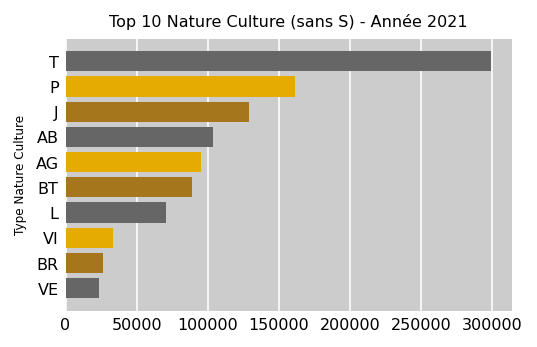

In [84]:
natCul = df2021['Nature culture'].value_counts().sort_values()[-11:-1]

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2_r(range(3))
y = natCul.index.tolist()
width = natCul.tolist()
ax.barh(y = y, width = width, color=colors)

def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
plt.title('Top 10 Nature Culture (sans S) - Année 2021', fontsize = 8)
plt.ylabel("Type Nature Culture", fontsize = 6)
nice_axes(ax)

## Region/Commune


On représente ici les 10 communes les plus chères. C'est Lions Le Saunier qui a enregistré les plus grosses ventes pour l'année 2021. On remarque que la plupart des communes se situent en zone rurale.

Text(0, 0.5, 'Valeur fonciere moyenne')

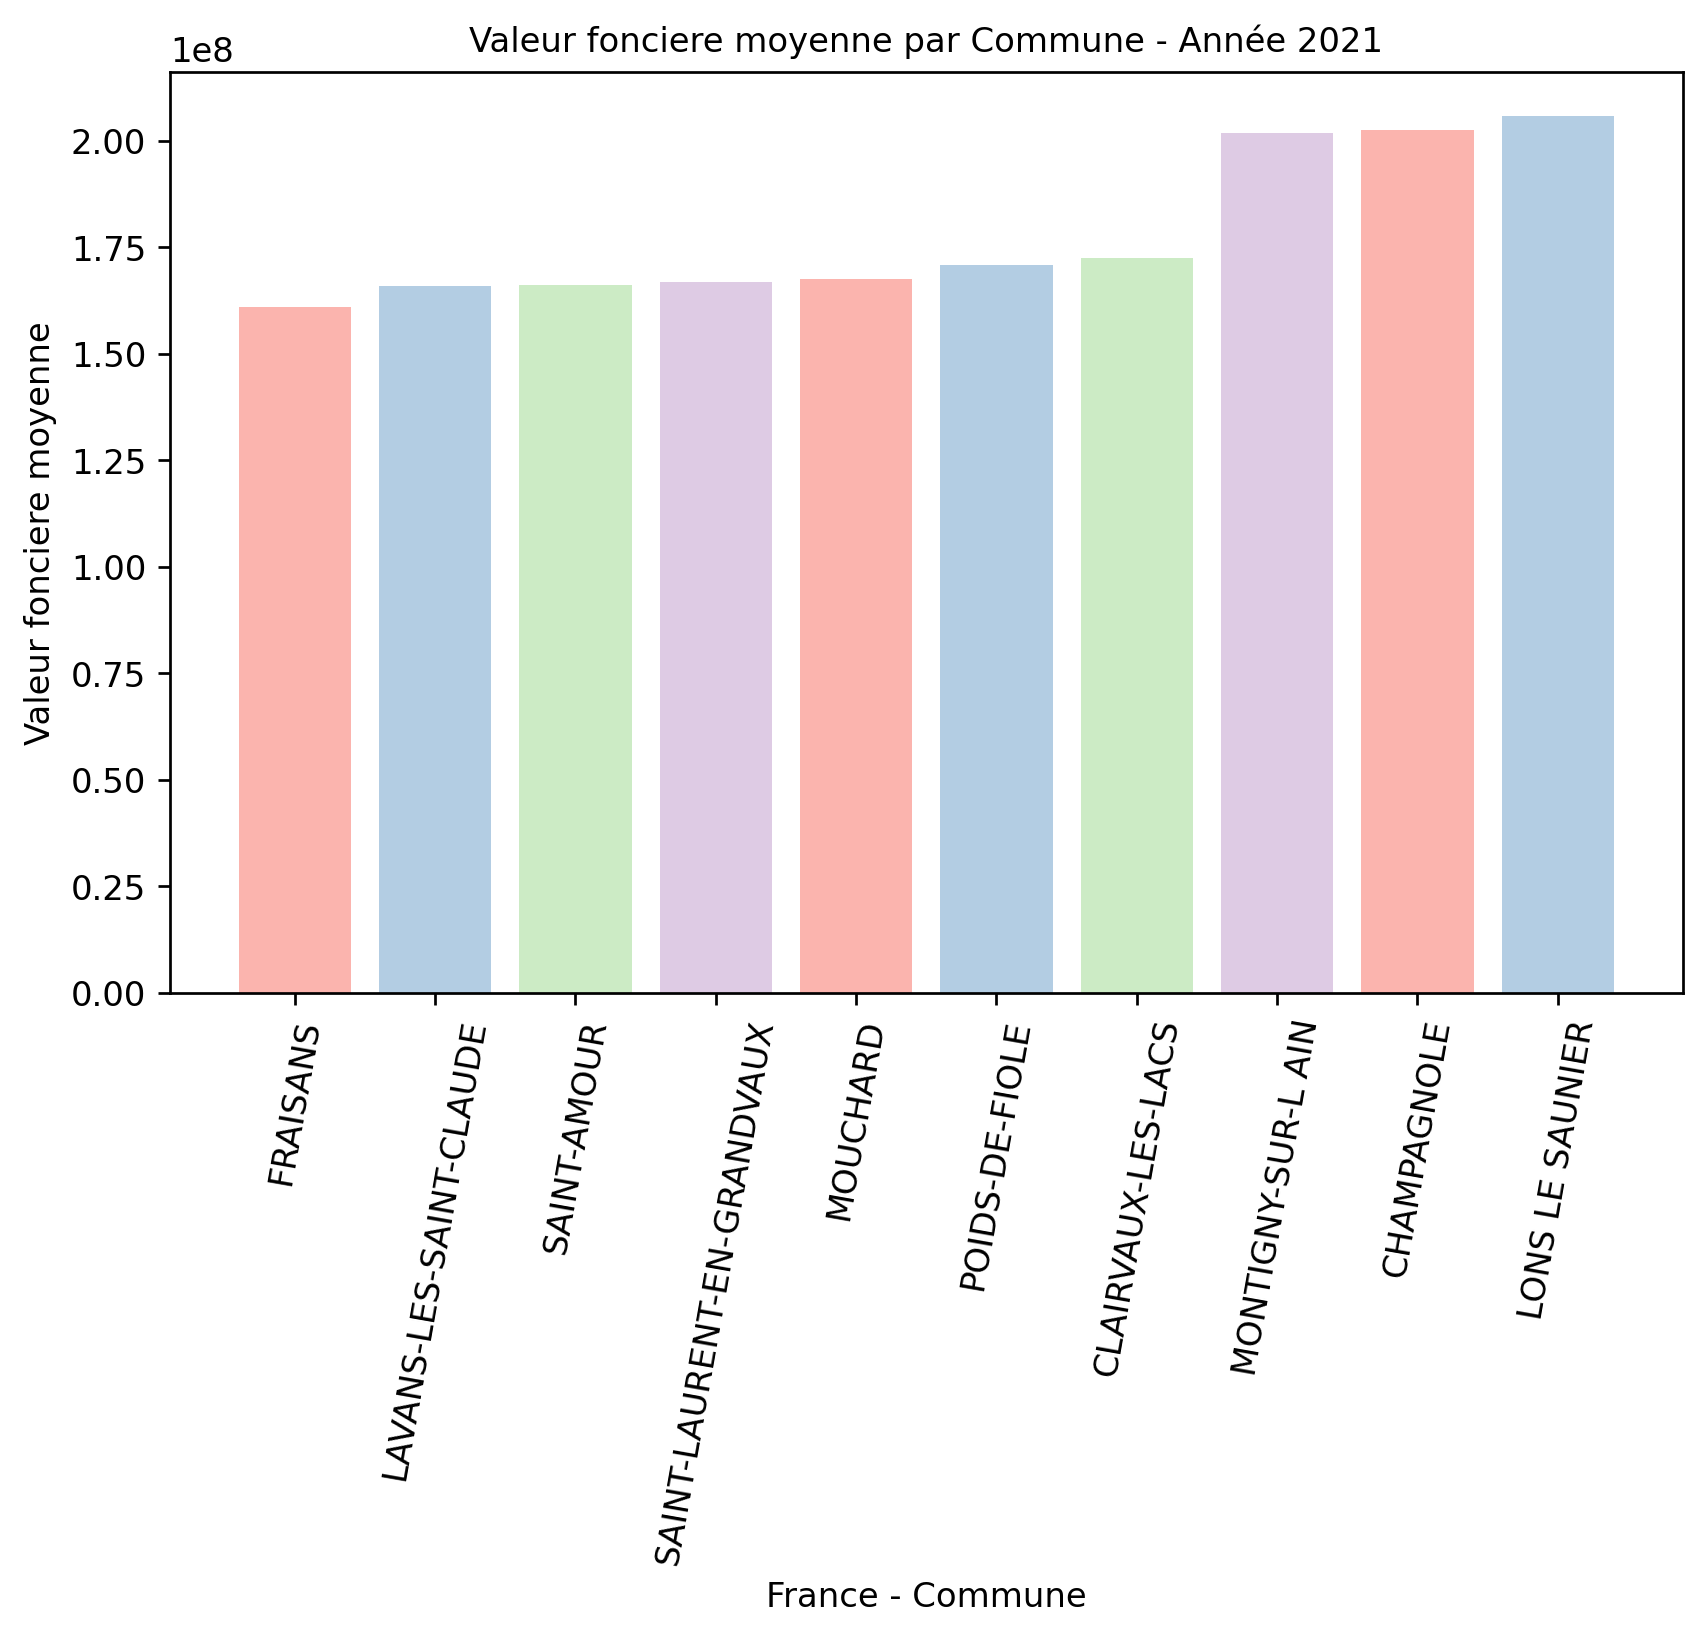

In [86]:
communesHauteVF = df2021.groupby(['Commune']).mean().sort_values(['Valeur fonciere']).tail(10)
x = communesHauteVF.index
y = communesHauteVF['Valeur fonciere']

fig, ax = plt.subplots(figsize=(8, 5), dpi=244)
colors = plt.cm.Pastel1(range(4))
ax.bar(x, y, color=colors)
plt.title('Valeur fonciere moyenne par Commune - Année 2021', fontsize = 10)
plt.xticks(rotation = 80)
plt.xlabel("France - Commune", fontsize = 10)
plt.ylabel("Valeur fonciere moyenne", fontsize = 10)

On peut obtenir ici le classement du top 20 des communes les plus "actives". C'est Besancon avec plus de 12000 biens vendus qui a été la commune la plus active de France en 2021. On peut aussi observer que la moyenne de biens vendus par commune parmi les communes les plus actives se situent vers 3000.

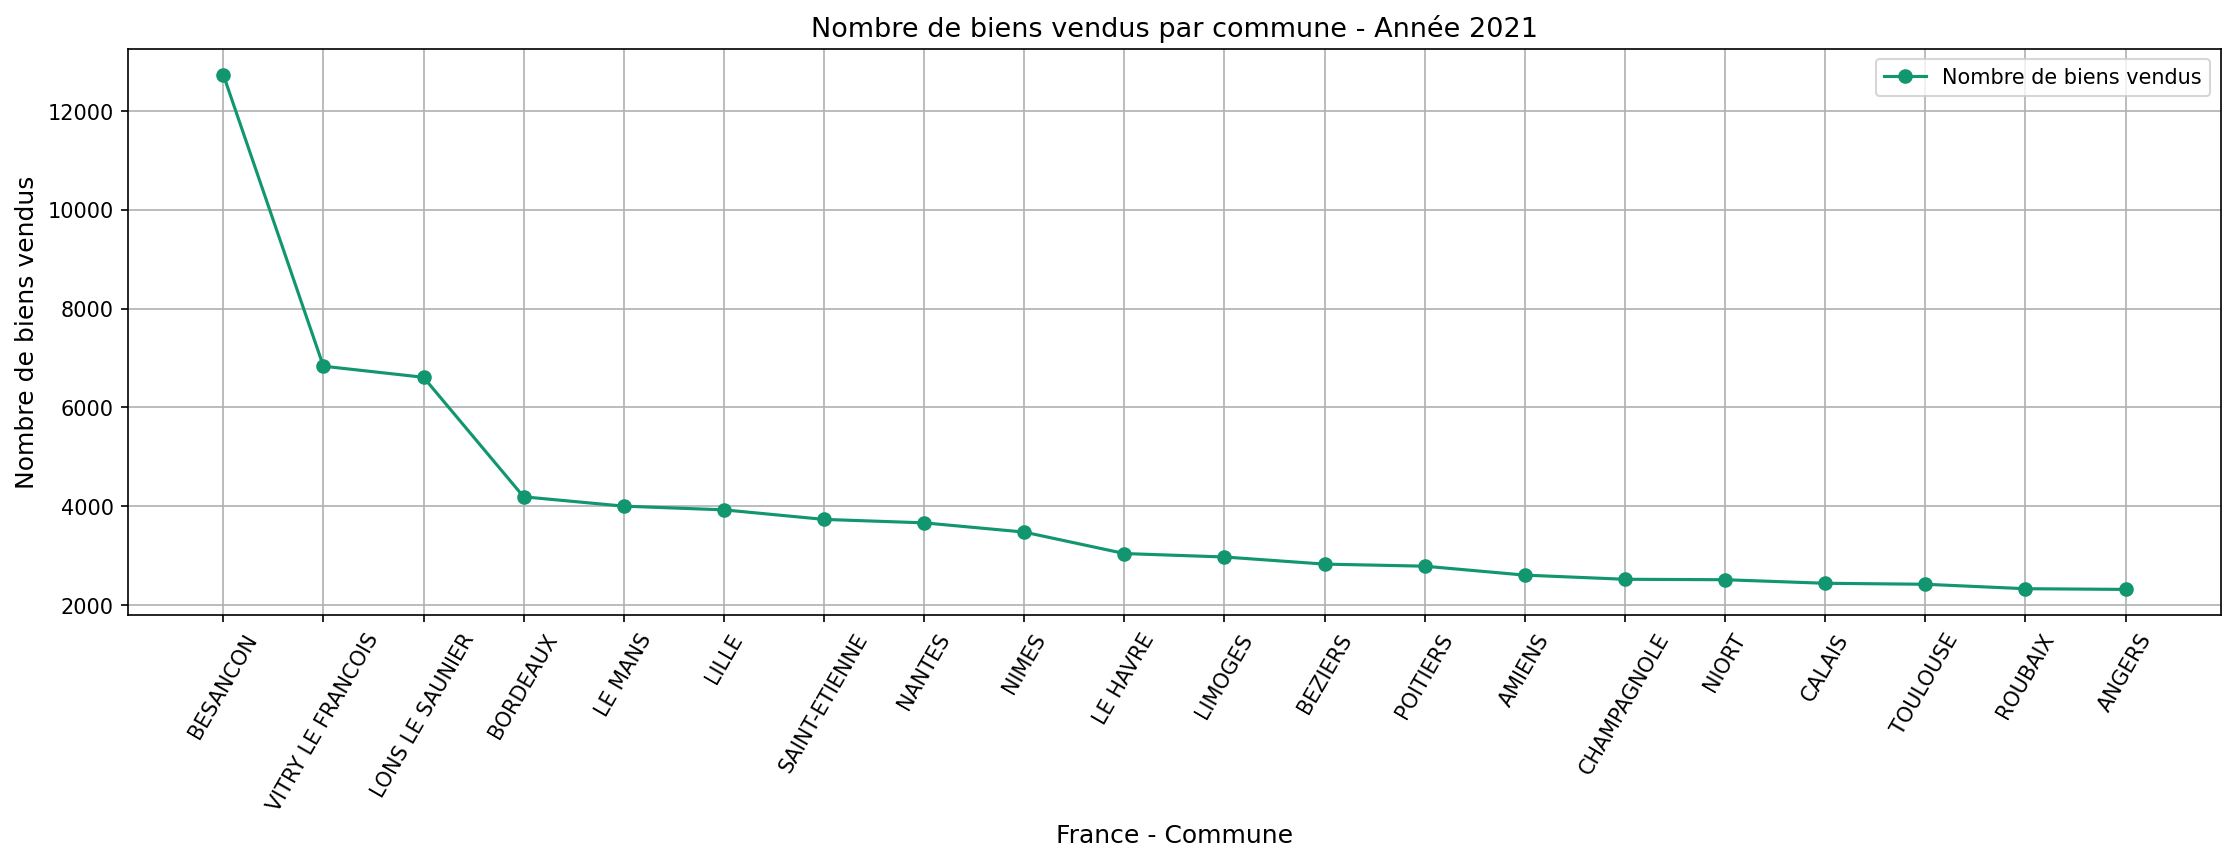

In [96]:
#Quel commune vend le plus
plt.rcParams['figure.figsize'] = [18, 5]
plt.rcParams['figure.dpi'] = 150

soldCommunes = df2021.groupby(['Commune']).size().sort_values(ascending = False).head(20)
x = soldCommunes.index
y = soldCommunes.tolist()

plt.plot(x, y, color='#119670', marker='o', label = 'Nombre de biens vendus')
plt.title('Nombre de biens vendus par commune - Année 2021', fontsize = 13)
plt.xticks(rotation=60)
plt.xlabel("France - Commune", fontsize = 12)
plt.ylabel("Nombre de biens vendus", fontsize = 12)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

## Par departement

Le graphique nous permet de voir le ratio appartement/maison au sein de chaque departement 

<AxesSubplot:xlabel='Code departement'>

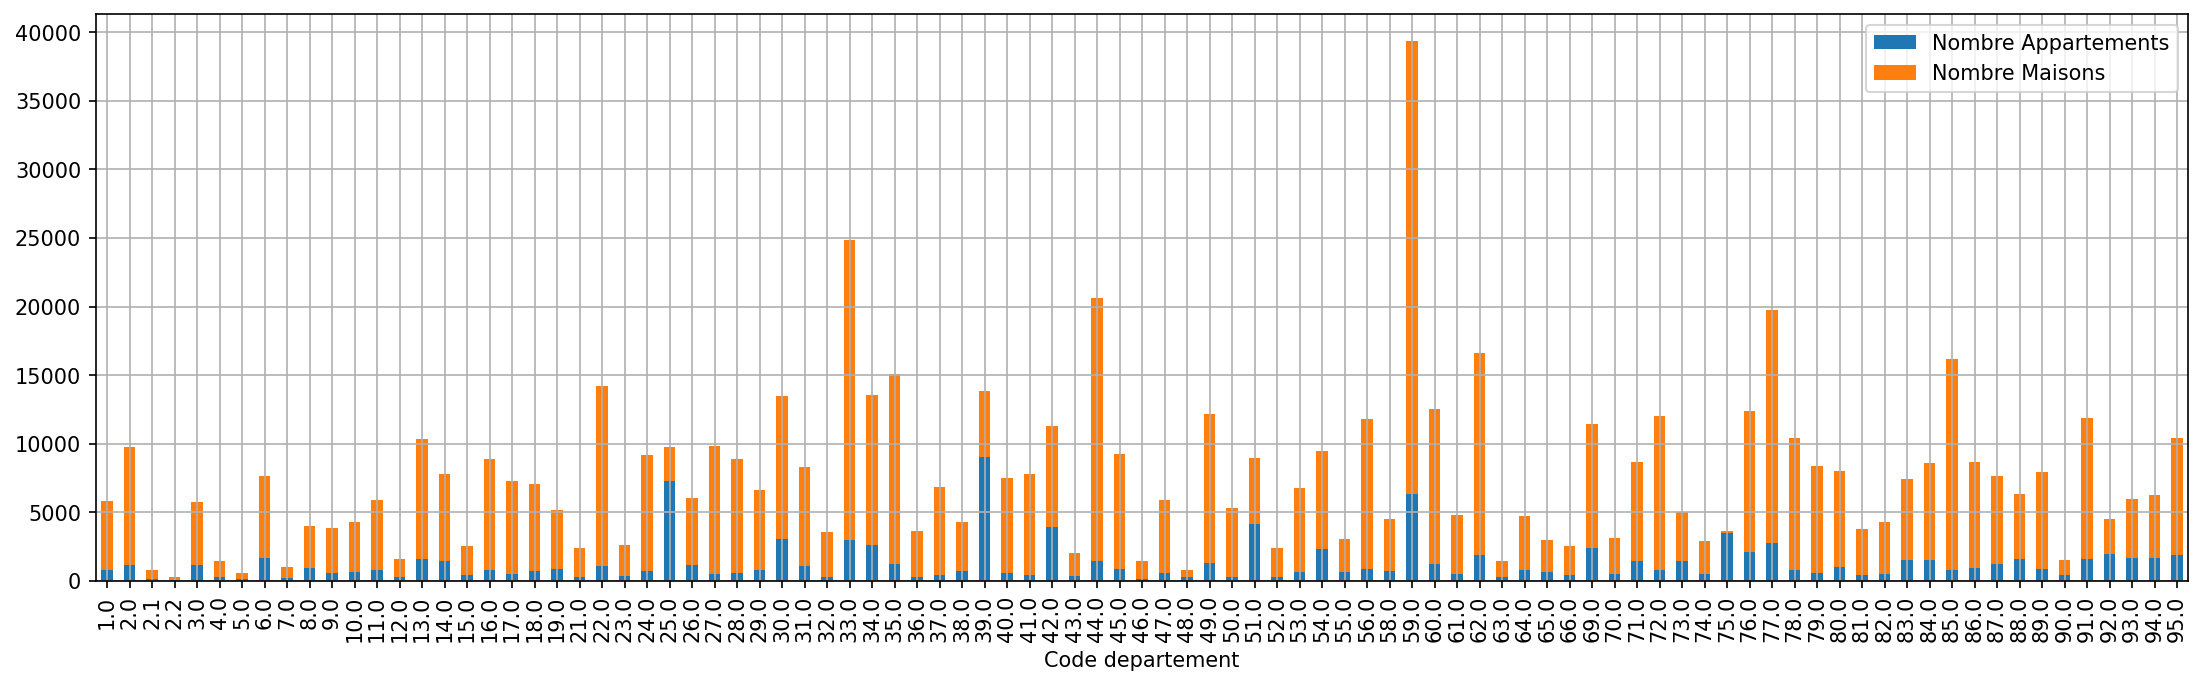

In [97]:
maison_appart = df2021.loc[(df2021['Type local'] == 'Appartement') | (df2021['Type local'] == 'Maison')]
df = pd.DataFrame(maison_appart.groupby(['Type local', 'Code departement']).size())
code_departement = pd.DataFrame(maison_appart.groupby(['Code departement']).size()).index

nombre_appart = pd.DataFrame(df[0]['Appartement']).values.tolist()
nombre_maison = pd.DataFrame(df[0]['Maison']).values.tolist()

appart = pd.DataFrame(nombre_appart, columns = ["Nombre Appartements"], index = code_departement)
maison = pd.DataFrame(nombre_maison, columns = ["Nombre Maisons"], index = code_departement)
new_df = pd.concat([appart,maison], axis = 1)
new_df.plot.bar(grid = True, stacked=True)

On se demande ici quel est le prix moyen de l'immobilier en Ile de france et le prix moyen de chaque département. Ainsi, dans le 92 la valeur foncière moyenne se situe aux alentours des 600 000 euros.

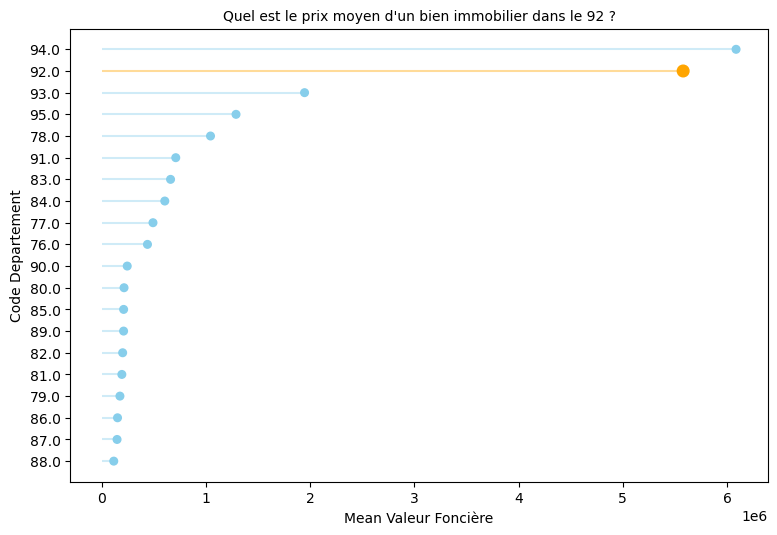

In [98]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

# Create a dataframe
df = df2021.groupby(['Code departement']).mean().tail(20)
 
# Reorder it based on values:
sortedDf = df.sort_values(['Valeur fonciere'])
my_range=range(1,len(df.index)+1)
 
# Create a color if the group is "B"
col=np.where(sortedDf.index == 92.0, 'orange', 'skyblue')
size=np.where(sortedDf.index == 92.0, 70, 30)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=sortedDf['Valeur fonciere'].tolist(), color=col, alpha=0.4)
plt.scatter(sortedDf['Valeur fonciere'].tolist(), my_range, color=col, s=size, alpha=1)
 
# Add title and axis names
plt.yticks(my_range, sortedDf.index)
plt.title("Quel est le prix moyen d'un bien immobilier dans le 92 ?", fontsize = 10)
plt.xlabel('Mean Valeur Foncière')
plt.ylabel('Code Departement')

# show the graph
plt.show()

On observe ici la corrélation entre la valeur foncière et la surface du terrain par département.

In [87]:
avgCommune = df2021.groupby(['Code departement']).mean().sort_values('Valeur fonciere', ascending = False).head(30)
departements = avgCommune.index
vf = avgCommune['Valeur fonciere'].tolist()
st = avgCommune['Surface terrain'].tolist()

df = pd.DataFrame({
'Departements': departements,
'Valeur foncière *1000$': [i /1000 for i in vf],
'Surface terrain': st,
})


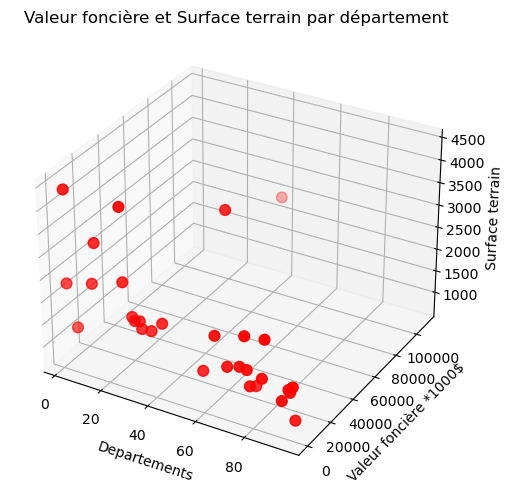

In [100]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Departements'], df['Valeur foncière *1000$'], df['Surface terrain'], c='red', s=60)
ax.set_xlabel('Departements')
ax.set_ylabel('Valeur foncière *1000$')
ax.set_zlabel('Surface terrain')
ax.set_title("Valeur foncière et Surface terrain par département")
plt.show()

On plot ici le top des départements les plus chers. C'est le 92 et le 94 qui possèdent les valeurs foncières les plus élevées avec respectivement une moyenne de plus de 500 000 et 600 000.

Text(0, 0.5, 'Valeur fonciere moyenne')

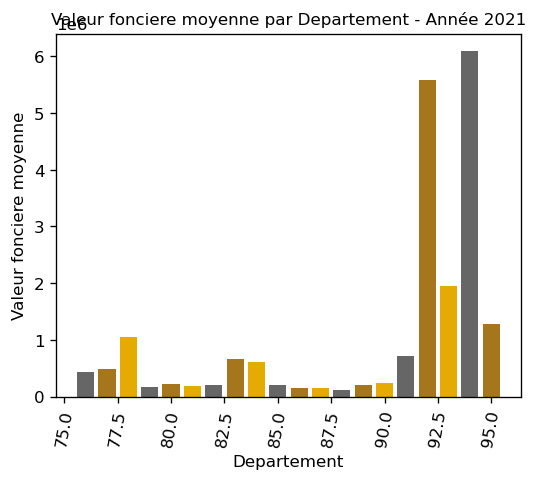

In [101]:
df = df2021.groupby(['Code departement']).mean().tail(20)
x = df.index
y = df['Valeur fonciere'].tolist()
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
colors = plt.cm.Dark2_r(range(3))
ax.bar(x, y, color=colors)
plt.title('Valeur fonciere moyenne par Departement - Année 2021', fontsize = 10)
plt.xticks(rotation = 80)
plt.xlabel("Departement", fontsize = 10)
plt.ylabel("Valeur fonciere moyenne", fontsize = 10)

## Paris

In [89]:
paris = df2021.loc[df2021['Code departement'] == 75]

Nous pouvons observer que les arrondissements du centre de paris font partie des plus chers. C'est le 4ème arrondissement qui a enregistré dès les prix moyens les plus élevés à près de 4.5 millions d'euros.

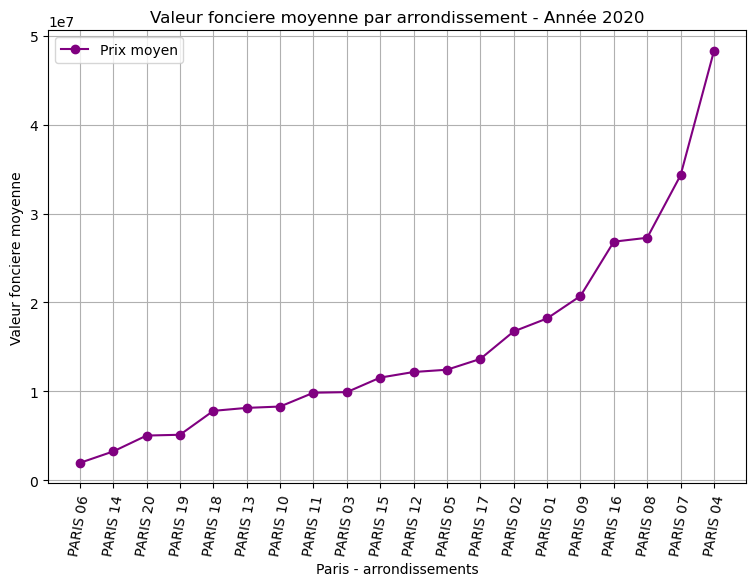

In [103]:
arrParis = paris.groupby(['Commune']).mean().sort_values(['Valeur fonciere'])
x = arrParis.index
y = arrParis['Valeur fonciere']

plt.plot(x, y, color='purple', marker='o', label='Prix moyen')
plt.title('Valeur fonciere moyenne par arrondissement - Année 2020')
plt.xticks(rotation=80)
plt.xlabel("Paris - arrondissements")
plt.ylabel("Valeur fonciere moyenne")
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

On observe le nopmbre de biens vendu par arrondissement

In [104]:
geoloc = json.load(open('arrondissements.geojson'))
ParisArr = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
venteArr = pd.DataFrame(paris['Commune'].value_counts().sort_index())['Commune'].tolist()

index = 0
for arr in geoloc["features"]:
    prop = arr["properties"]
    folium.CircleMarker(prop["geom_x_y"], 
                        popup = prop["l_ar"],
                        radius = venteArr[index] / 100).add_to(ParisArr,)
    index +=1

ParisArr

On représente la surface des terrains des arrondissements parisiens. À l'exception du 1er, on observe que les arrondissements en périphérie font majoritairement partie de ceux qui possèdent des biens avec le plus de surface de terrain. C'est le 14ème qui possède le plus gros écart inter-quartile: des surfaces allant de 100 à 5000m².

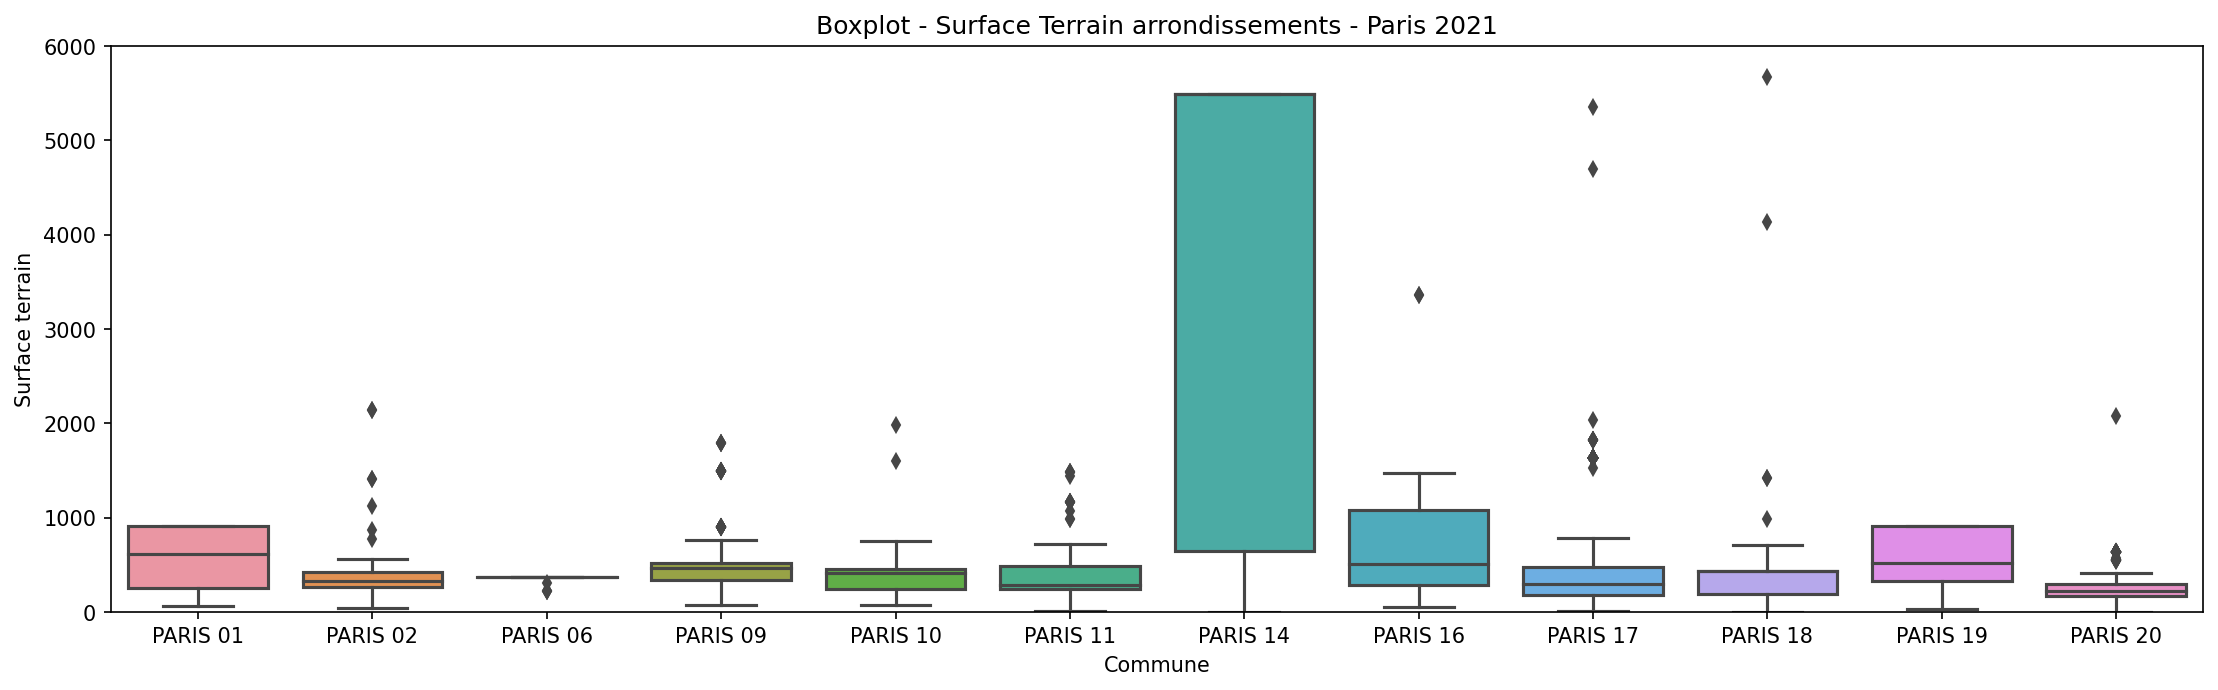

In [93]:
#Quel arrondissement comptabilise les plus grosses ventes en termes de surface
plt.rcParams['figure.figsize'] = [18, 5]
plt.rcParams['figure.dpi'] = 150

arrParis = paris.sort_values(['Commune']).reset_index()
df = arrParis[['Commune','Surface terrain']]

# On enleve les arrondissements qui faussent les boxplots
df = df.loc[(df['Surface terrain'] != 0) & (df['Commune'] != 'PARIS 03') & (df['Commune'] != 'PARIS 04') & (df['Commune'] != 'PARIS 05') & (df['Commune'] != 'PARIS 07') & (df['Commune'] != 'PARIS 08') & (df['Commune'] != 'PARIS 12') & (df['Commune'] != 'PARIS 13') & (df['Commune'] != 'PARIS 15')]
            
# Boxplot
ax = sns.boxplot(x = 'Commune', y = 'Surface terrain', data = df)
ax.set_ylim([0,6000])

# add title
plt.title("Boxplot - Surface Terrain arrondissements - Paris 2021")
plt.show()

On peut observer ici un emboitement des 3 premiers arrondissements de Paris dans leur analyse de leur valeur foncière, surface terrain et surface réelle bâties. Le deuxieme arrondissement est le plus cher avec une plus grande surface globale. Suivit du 1er puis du 3e selon leurs valeurs foncières mais les deux ayant une surface globalement similaire. Il semblerait "moins rentable" d'investir dans le 1er.

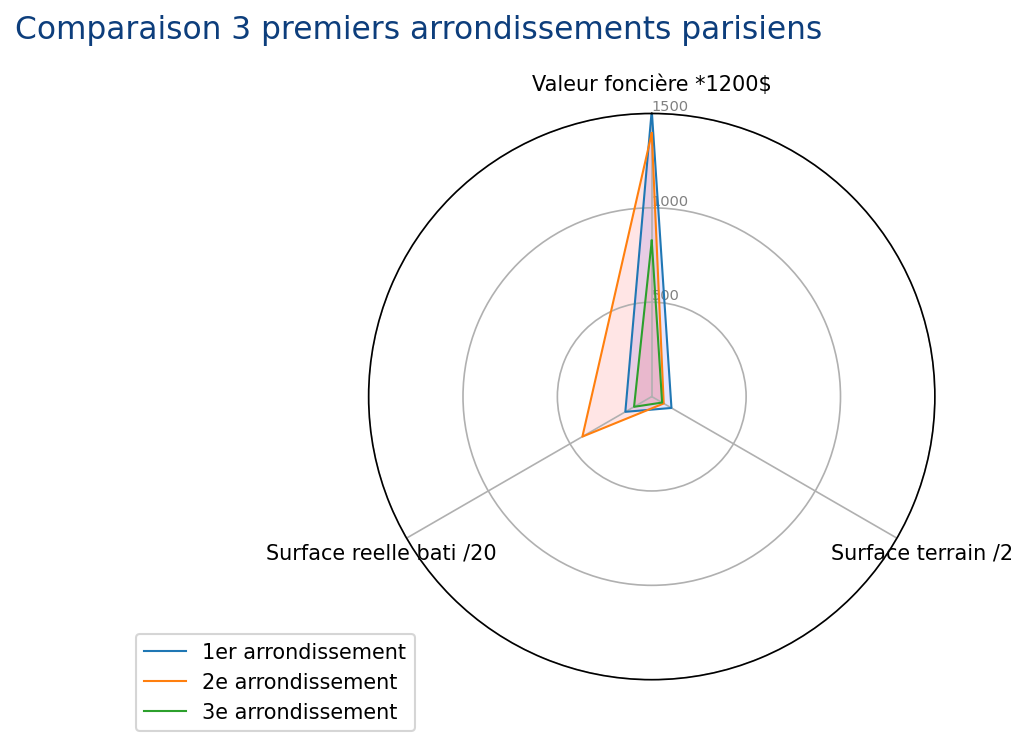

In [100]:
import math

splot = paris.groupby(['Commune']).mean().sort_values('Commune')
arrondissement = splot.index
vf = splot['Valeur fonciere'].tolist()
st = splot['Surface terrain'].tolist()
srb = splot['Surface reelle bati'].tolist()
df = pd.DataFrame({
'Arrondissement': arrondissement,
'Valeur foncière *1200$': [i /1200 for i in vf],
'Surface terrain /2': [i *2 for i in st],
'Surface reelle bati /20': [i *20 for i in srb],
})
 
# number of variables
cat=list(df)[1:]
N = len(cat)
 
# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], cat)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5000,10000,15000], ["500","1000","1500"], color="grey", size=7)
plt.ylim(0,15000)
 
# Arr1
vals=df.loc[0].drop('Arrondissement').values.flatten().tolist()
vals += vals[:1]
ax.plot(angles, vals, linewidth=1, linestyle='solid', label="1er arrondissement")
ax.fill(angles, vals, 'b', alpha=0.1)
 
# Arr2
vals=df.loc[1].drop('Arrondissement').values.flatten().tolist()
vals += vals[:1]
ax.plot(angles, vals, linewidth=1, linestyle='solid', label="2e arrondissement")
ax.fill(angles, vals, 'r', alpha=0.1)

# Arr3
vals=df.loc[2].drop('Arrondissement').values.flatten().tolist()
vals += vals[:1]
ax.plot(angles, vals, linewidth=1, linestyle='solid', label="3e arrondissement")
ax.fill(angles, vals, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add title
ax.annotate('Comparaison 3 premiers arrondissements parisiens', xy=(50,650),  xycoords='axes pixels', horizontalalignment='center', verticalalignment='center', fontsize=15, color='#0d3e7c')

# Show the graph
plt.show()

Relation entre Valeur foncière et Surface terrain en fonction des arrondissements

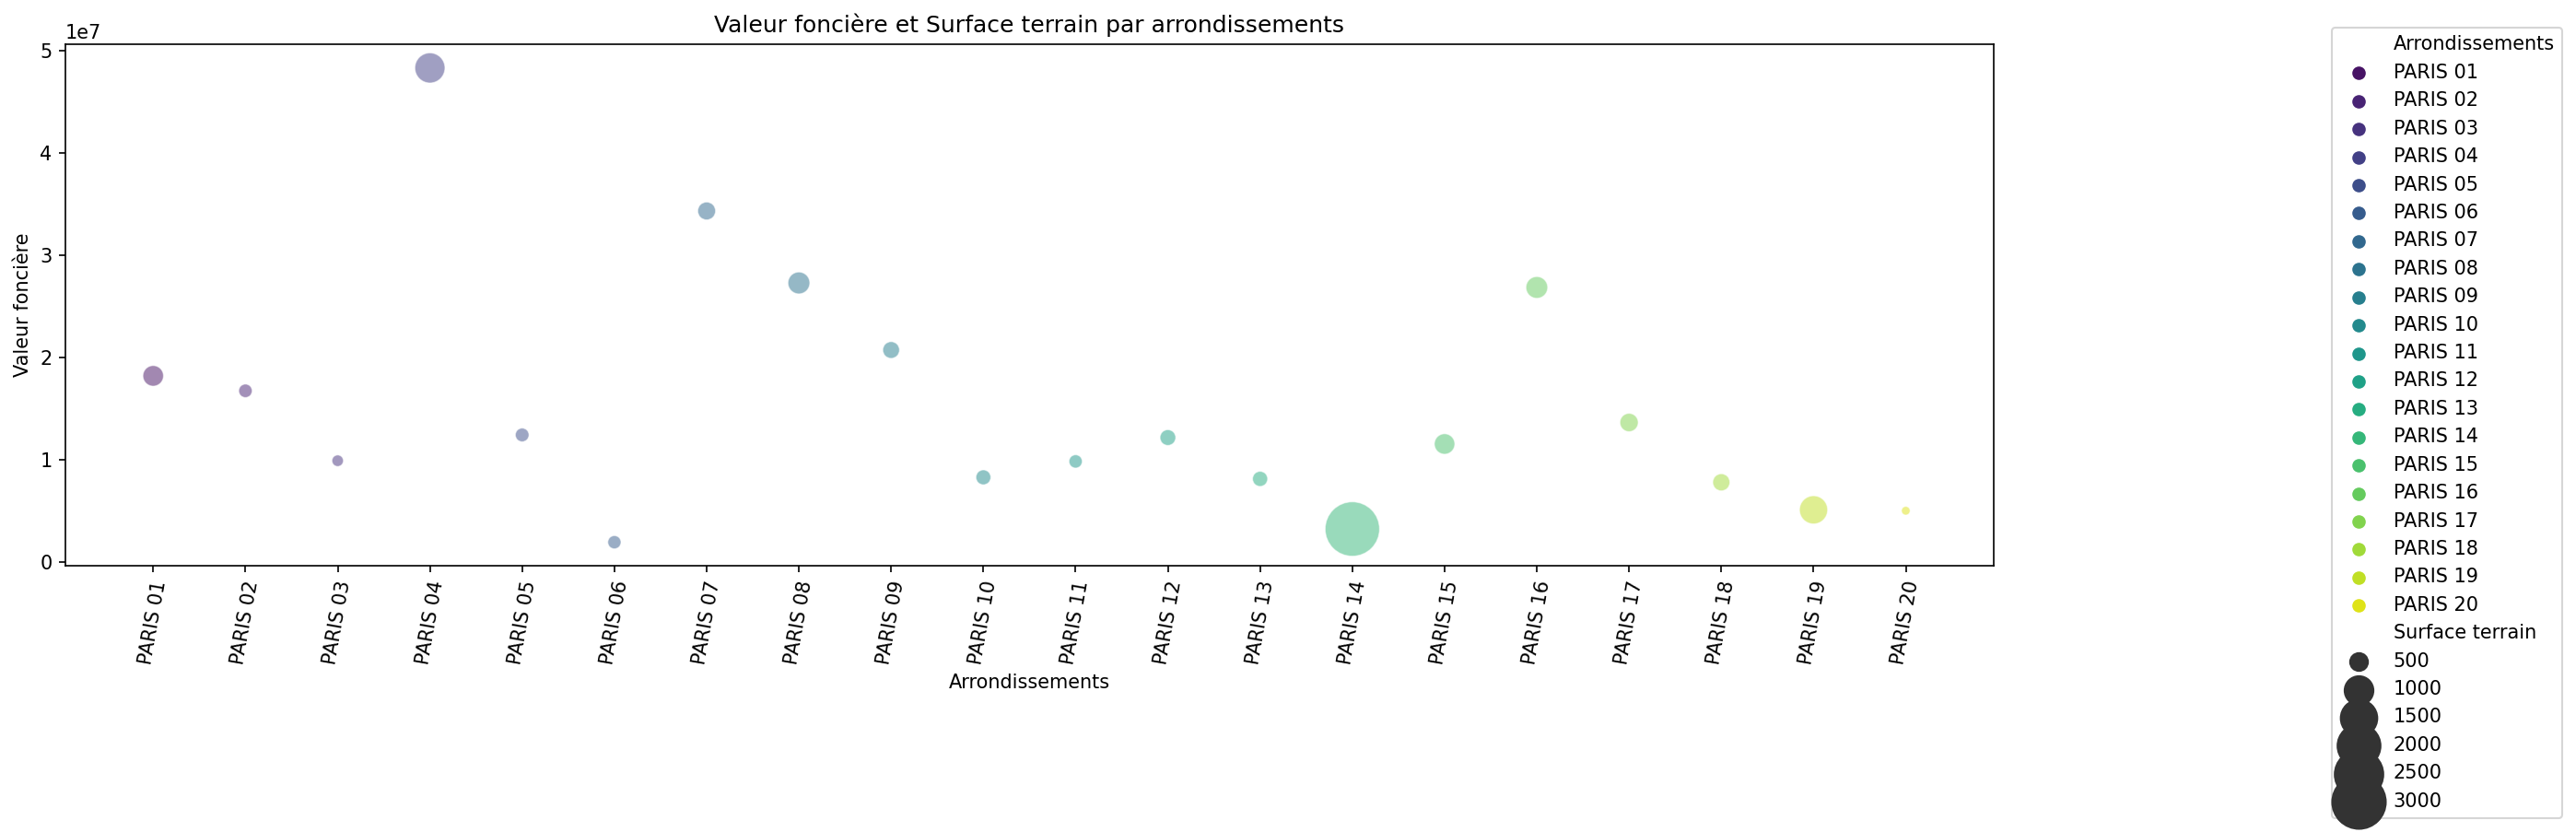

In [107]:
arrValeurSurface = paris.groupby(['Commune']).mean().sort_values('Commune')
arrondissement = arrValeurSurface.index
vf = arrValeurSurface['Valeur fonciere'].tolist()
st = arrValeurSurface['Surface terrain'].tolist()

df = pd.DataFrame({
'Arrondissements': arrondissement,
'Valeur foncière': vf,
'Surface terrain': st,
})

sns.scatterplot(data=df, x="Arrondissements", y="Valeur foncière", size="Surface terrain", hue = "Arrondissements", palette="viridis", edgecolors="black", alpha=0.5, sizes=(20, 800))
# Add titles (main and on axis)
plt.xticks(rotation = 80)
plt.title("Valeur foncière et Surface terrain par arrondissements")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()

## Marseille

In [172]:
Marseille = df2021.loc[(df2021['Commune'].str.contains("MARSEILLE")) & (df2021['Commune'].str.contains("EME"))]
Marseille.head(20)

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code commune,Section,Type local,Surface reelle bati,Nature culture,Surface terrain,Date MM/JJ/AAAA
198980,11/01/2021,Vente,230000.0,MARSEILLE 15EME,13.0,215,C,Local industriel. commercial ou assimilé,270.0,S,151.0,01/11/2021
198981,13/01/2021,Vente,610000.0,MARSEILLE 16EME,13.0,216,A,Maison,118.0,S,605.0,01/13/2021
198982,06/01/2021,Vente,257350.0,MARSEILLE 16EME,13.0,216,D,NaN,NaN,J,60.0,01/06/2021
198983,06/01/2021,Vente,257350.0,MARSEILLE 16EME,13.0,216,D,NaN,NaN,J,64.0,01/06/2021
198984,06/01/2021,Vente,257350.0,MARSEILLE 16EME,13.0,216,D,NaN,NaN,J,64.0,01/06/2021
198985,06/01/2021,Vente,257350.0,MARSEILLE 16EME,13.0,216,D,NaN,NaN,J,60.0,01/06/2021
198986,15/01/2021,Vente,260000.0,MARSEILLE 16EME,13.0,216,H,Appartement,60.0,S,278.0,01/15/2021
198987,15/01/2021,Vente,260000.0,MARSEILLE 16EME,13.0,216,H,Dépendance,0.0,S,278.0,01/15/2021
198988,15/01/2021,Vente,260000.0,MARSEILLE 16EME,13.0,216,H,Appartement,52.0,S,278.0,01/15/2021
198989,15/01/2021,Vente,260000.0,MARSEILLE 16EME,13.0,216,H,Appartement,15.0,S,278.0,01/15/2021


Pour débuter notre étude de marseille, nous avons choisi d'observer la valeur foncière par arrondissement

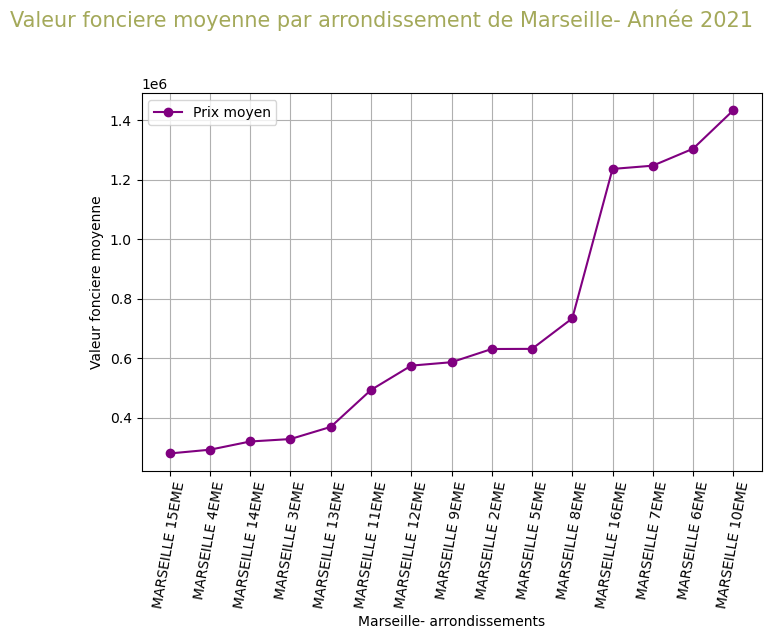

In [208]:
arrMarseille = Marseille.groupby(['Commune']).mean().sort_values(['Valeur fonciere'])
x = arrMarseille.index
y = arrMarseille['Valeur fonciere']

plt.plot(x, y, color='purple', marker='o', label='Prix moyen')
plt.annotate('Valeur fonciere moyenne par arrondissement de Marseille- Année 2021', xy=(240,450),  xycoords='axes pixels', horizontalalignment='center', verticalalignment='center', fontsize=15, color='#a4a95a')
plt.xticks(rotation=80)
plt.xlabel("Marseille- arrondissements")
plt.ylabel("Valeur fonciere moyenne")
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

Toujours par arrondissement, nous avons étudié le nombre de biens vendus en fonction des arrondissements de marseille de deux manières différentes. Tout d'abord sous forme d'un nuage de point :

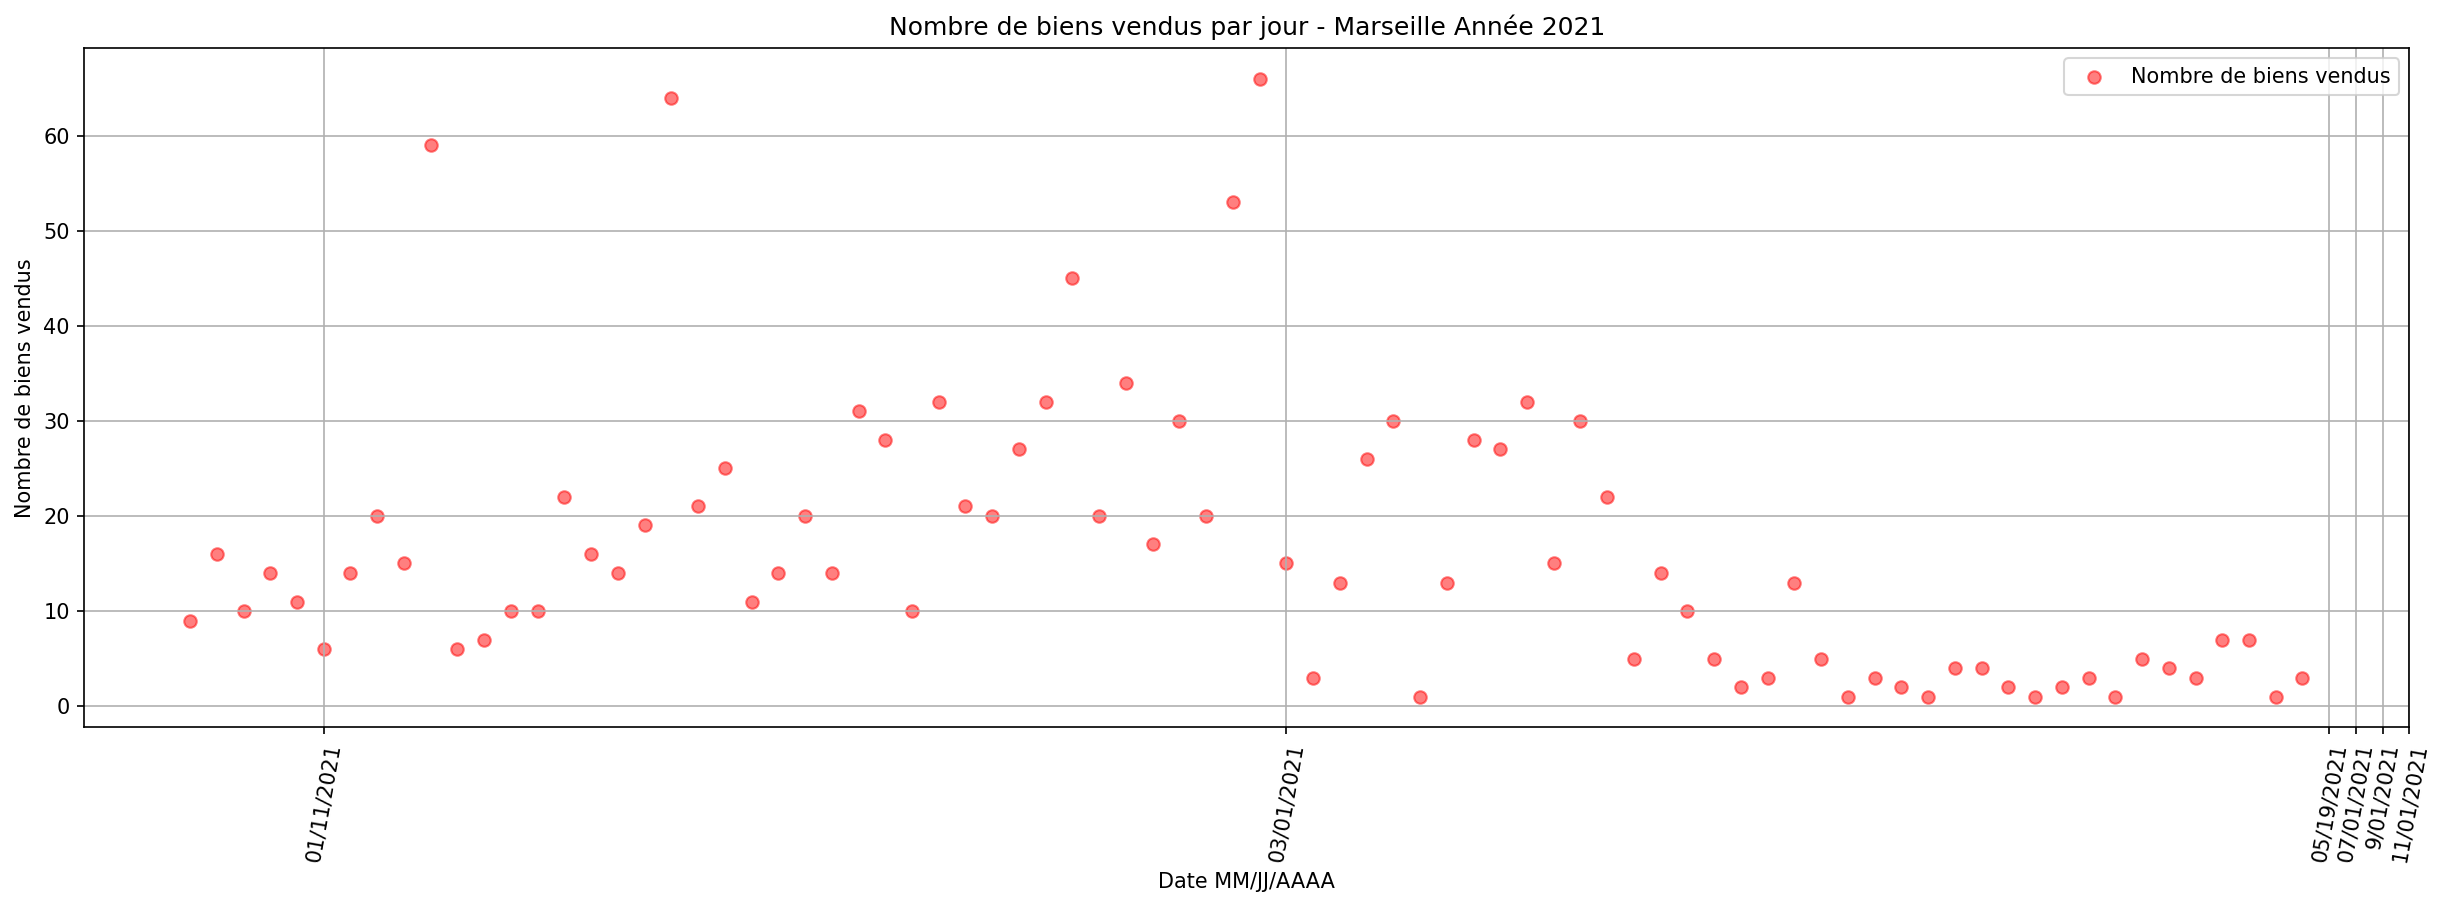

In [110]:
plt.rcParams['figure.figsize'] = [20, 6]
plt.rcParams['figure.dpi'] = 150

df = df2021['Date MM/JJ/AAAA'].value_counts().sort_values(ascending = False).head(290)
df = df.sort_index()
x = df.index.tolist()
y = df.tolist()

df = Marseille['Date MM/JJ/AAAA'].value_counts().sort_values(ascending = False)
df = df.sort_index()
x = df.index.tolist()
y = df.tolist()

plt.grid(True)
plt.scatter(x, y, c = 'red', alpha = 0.5, label='Nombre de biens vendus')
plt.title('Nombre de biens vendus par jour - Marseille Année 2021')
plt.xticks(ticks = ['01/11/2021','03/01/2021','05/19/2021','07/01/2021','9/01/2021','11/01/2021'], rotation=80)
plt.xlabel("Date MM/JJ/AAAA")
plt.ylabel("Nombre de biens vendus")
plt.legend()
plt.show()

Puis d'un diagramme circulaire :

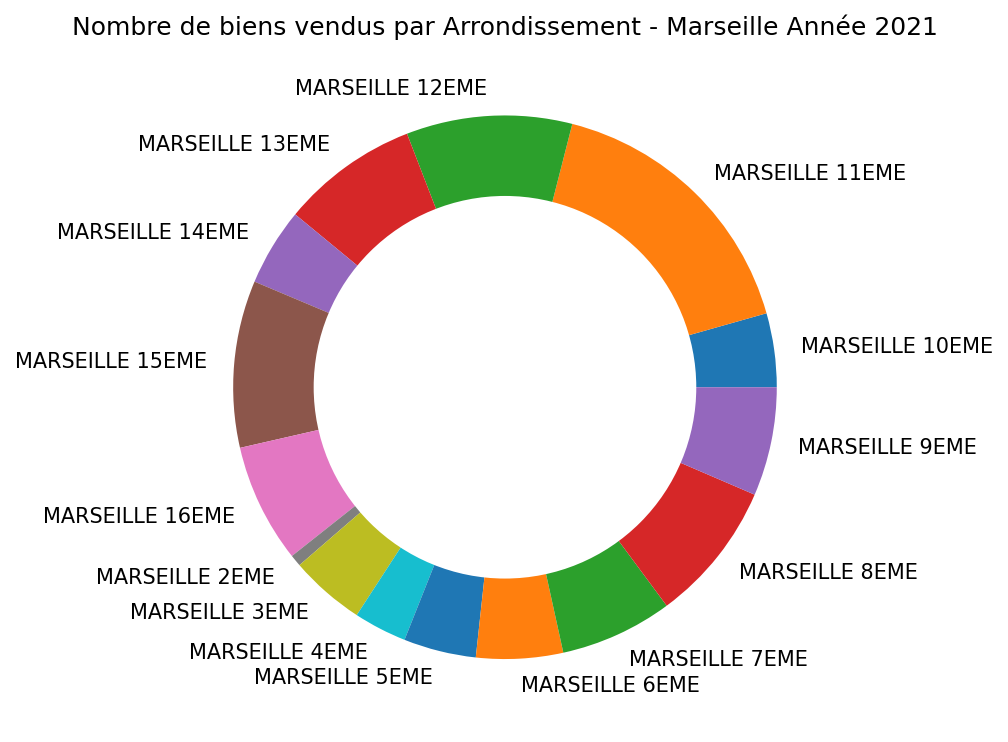

In [111]:
arrMarseille = Marseille.groupby(['Commune']).size()
x = arrMarseille.index.tolist()
y = arrMarseille.tolist()
 
plt.pie(y, labels = x)
plt.title("Nombre de biens vendus par Arrondissement - Marseille Année 2021")

# Add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## Comparaison avec 2020

In [144]:
df2020 = pd.read_csv('valeursfoncieres-2020.txt', sep = '|')

C:\Users\samue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [145]:
df2020

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,2.0,Appartement,NaN,22.0,1.0,S,NaN,447.0
3484953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,4.0,Local industriel. commercial ou assimilé,NaN,100.0,0.0,S,NaN,447.0
3484954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
3484955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,...,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0


### Cleaning Dataset de 2020
On observe que le Dataset comporte beaucoup de donnee manquante

On commence par supprimer les colonnes qui ne nous interesse pas 

In [146]:
del df2020['Code type local']
del df2020['No disposition']
del df2020['Type de voie']
del df2020['No voie']
del df2020['Code voie']
del df2020['Nombre pieces principales']
del df2020['No plan']
del df2020['Code postal']
del df2020['Voie']
del df2020['Nombre de lots']

#### Les NaN
En étudiant les données on obsere que certaine colonne se compose majoritairement de NaN, On fait donc le choix de supprimer la colonne quand elle contient plus de la moitié de NaN c'est a dire 1500000.


In [147]:
allNA = df2020.isna().sum()
for i in allNA.index:
  if allNA[i] >= 1700000:
    del df2020[i]

In [149]:
df2020 = df2020[df2020['Commune'].notna()]

Valeur Vonciere n'est pas du bon type c'est une colonne de String on la passe donc en Float. De plus il manque des valeurs pour ne pas pertuber les futurs graphique on comble les NaN par la valeur moyenne de la valeur fonciere.

In [150]:
df2020["Valeur fonciere"] = df2020["Valeur fonciere"].str.replace(',','.').astype(float)

In [151]:
vf = df2020['Valeur fonciere'].mean()

In [152]:
df2020['Valeur fonciere'] = df2020['Valeur fonciere'].replace(np.nan, vf)

De la meme maniere que pour la valeur fonciere on observe qu'il y a majoritairment de Nature culture de type S. On comble donc les NaN par des S.

In [153]:
df2020['Nature culture'] = df2020['Nature culture'].replace(np.nan, 'S')

In [154]:
lSec = df2020['Section'].value_counts()
df2020['Section'] = df2020['Section'].replace(np.nan, random.choice(lSec))

In [155]:
df2020['Code departement'] = df2020['Code departement'].replace('2A', 2.1)
df2020['Code departement'] = df2020['Code departement'].replace('2B', 2.2)

In [156]:
dateF = []
for i in df2020.index:
    date = df2020['Date mutation'][i].split('/')
    cur = date[1]+"/" + date[0] + "/" + date[2]
    dateF.append(cur)
df2020['Date MM/JJ/AAAA'] = dateF
#del df2021['Date mutation']

In [157]:
index = df2020['Surface terrain'].index[df2020['Surface terrain'].apply(np.isnan)]

In [158]:
df2020 = df2020.drop(index)

In [159]:
empty = []
for i in range(970,990):
    empty.append(i)

df2020 = df2020[df2020['Code departement'].isin(empty) == False]

In [160]:
NA = df2020.isna().sum()
NA

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Commune                      0
Code departement             0
Code commune                 0
Section                      0
Type local             1356030
Surface reelle bati    1358096
Nature culture               0
Surface terrain              0
Date MM/JJ/AAAA              0
dtype: int64

### Annalyse de la donnée de 2020

In [161]:
df2020

,Date mutation,Nature mutation,Valeur fonciere,Commune,Code departement,Code commune,Section,Type local,Surface reelle bati,Nature culture,Surface terrain,Date MM/JJ/AAAA
0,07/01/2020,Vente,8000.0,CEYZERIAT,1,72,AK,NaN,NaN,T,1061.0,01/07/2020
1,02/01/2020,Vente,2175.0,LAIZ,1,203,B,NaN,NaN,BT,85.0,01/02/2020
2,02/01/2020,Vente,2175.0,LAIZ,1,203,B,NaN,NaN,T,1115.0,01/02/2020
3,02/01/2020,Vente,2175.0,LAIZ,1,203,B,NaN,NaN,T,1940.0,01/02/2020
4,02/01/2020,Vente,2175.0,LAIZ,1,203,C,NaN,NaN,T,1148.0,01/02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
3484951,16/12/2020,Vente,1937500.0,PARIS 04,75,104,AW,Appartement,32.0,S,447.0,12/16/2020
3484952,16/12/2020,Vente,1937500.0,PARIS 04,75,104,AW,Appartement,22.0,S,447.0,12/16/2020
3484953,16/12/2020,Vente,1937500.0,PARIS 04,75,104,AW,Local industriel. commercial ou assimilé,100.0,S,447.0,12/16/2020
3484954,16/12/2020,Vente,1937500.0,PARIS 04,75,104,AW,Dépendance,0.0,S,447.0,12/16/2020


## Toute la France en 2020


Pour mettre en exergue les différences entre l'année 2020 et 2021, nous avons commencé par observer le nombre de vente par département sur ces deux années.

<AxesSubplot:xlabel='Code departement'>

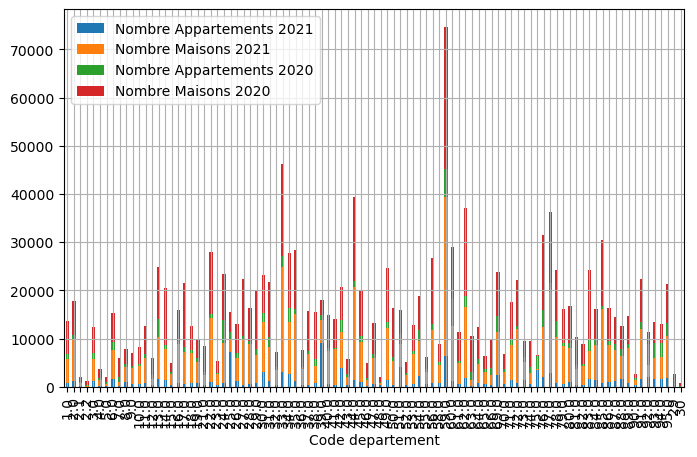

In [199]:

maisonetappart = df2021.loc[(df2021['Type local'] == 'Appartement') | (df2021['Type local'] == 'Maison')]
df = pd.DataFrame(maisonetappart.groupby(['Type local', 'Code departement']).size())
depart = pd.DataFrame(maisonetappart.groupby(['Code departement']).size()).index
nbappart = pd.DataFrame(df[0]['Appartement']).values.tolist()
nbmaison = pd.DataFrame(df[0]['Maison']).values.tolist()
appart = pd.DataFrame(nbappart, columns = ["Nombre Appartements 2021"], index = depart)
maison = pd.DataFrame(nbmaison, columns = ["Nombre Maisons 2021"], index = depart)
maisonetappart2020 = df2020.loc[(df2020['Type local'] == 'Appartement') | (df2020['Type local'] == 'Maison')]
df_2020 = pd.DataFrame(maisonetappart2020.groupby(['Type local', 'Code departement']).size())
depart2020 = pd.DataFrame(maisonetappart2020.groupby(['Code departement']).size()).index
nbappart_2020 = pd.DataFrame(df_2020[0]['Appartement']).values.tolist()
nbmaison_2020 = pd.DataFrame(df_2020[0]['Maison']).values.tolist()
appart_2020 = pd.DataFrame(nbappart_2020, columns = ["Nombre Appartements 2020"], index = depart2020)
maison_2020 = pd.DataFrame(nbmaison_2020, columns = ["Nombre Maisons 2020"], index = depart2020)
df = pd.concat([appart, maison, appart_2020, maison_2020], axis = 1)
df.plot.bar(grid = True, stacked=True)

In [200]:
paris2020 = df2020.loc[df2020['Code departement'] == 75]

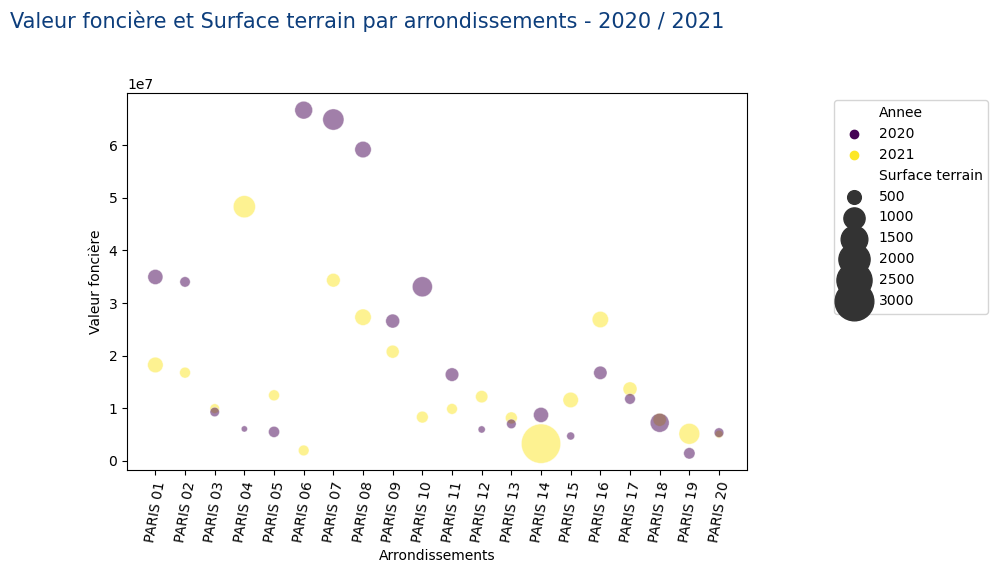

In [206]:
arrondissement_mean = paris.groupby(['Commune']).mean().sort_values('Commune')
arrondissement = arrondissement_mean.index
valf = arrondissement_mean['Valeur fonciere'].tolist()
surfft = arrondissement_mean['Surface terrain'].tolist()
annee = [2021]*(len(arrondissement_mean.index))
df_2021 = pd.DataFrame({
'Arrondissements': arrondissement,
'Valeur foncière': valf,
'Surface terrain': surfft,
'Annee': annee
})
arrondissement_mean_2020 = paris_2020.groupby(['Commune']).mean().sort_values('Commune')
arrondissement_2020 = arrondissement_mean_2020.index
valf_2020 = arrondissement_mean_2020['Valeur fonciere'].tolist()
surfft_2020 = arrondissement_mean_2020['Surface terrain'].tolist()
annee_2020 = [2020]*(len(arrondissement_mean_2020.index))
df_2020 = pd.DataFrame({
'Arrondissements': arrondissement_2020,
'Valeur foncière': valf_2020,
'Surface terrain': surfft_2020,
'Annee': annee_2020
})
df = pd.concat([df_2021, df_2020], axis = 0)
sns.scatterplot(data=df, x="Arrondissements", y="Valeur foncière", size="Surface terrain", hue = "Annee", palette="viridis", edgecolors="black", alpha=0.5, sizes=(20, 800))
plt.xticks(rotation = 80)
plt.annotate('Valeur foncière et Surface terrain par arrondissements - 2020 / 2021', xy=(240,450),  xycoords='axes pixels', horizontalalignment='center', verticalalignment='center', fontsize=15, color='#0d3e7c')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Par la suite, nous proposons une visualisation 3D pour le graphique précédente. Du fait que nous avons 3 données à représenter, ce type de graphique efficace :

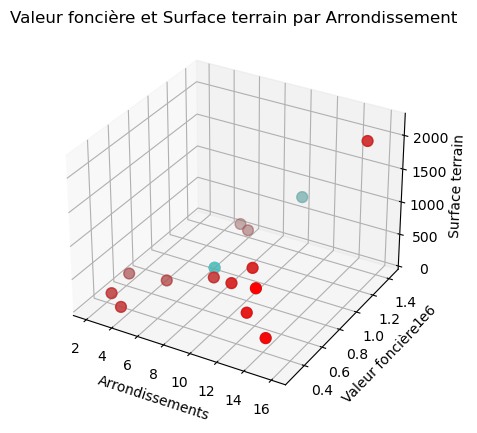

In [207]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

arrondissement_mean = Marseille.groupby(['Commune']).mean().sort_values('Commune')
arrondissement = arrondissement_mean.index
valf = arrondissement_sfvf['Valeur fonciere'].tolist()
surfft = arrondissement_sfvf['Surface terrain'].tolist()
annee = ["#FF0000"]*(len(arrondissement_sfvf.index))
df_2021 = pd.DataFrame({
'Arrondissements': arrondissement,
'Valeur foncière': valf,
'Surface terrain': surfft,
'Annee': annee
})
arrondissement_mean_2020 = Marseille.groupby(['Commune']).mean().sort_values('Commune')
arrondissement_2020 = arrondissement_mean_2020.index
valf_2020 = arrondissement_mean_2020['Valeur fonciere'].tolist()
surfft_2020 = arrondissement_mean_2020['Surface terrain'].tolist()
col2020 = ["#00FFFF"]*(len(arrondissement_mean_2020.index))
df_2020 = pd.DataFrame({
'Arrondissements': arrondissement_2020,
'Valeur foncière': valf_2020,
'Surface terrain': surfft_2020,
'Annee': col2020
})
df = pd.concat([df_2021, df_2020], axis = 0)
df['Arrondissements'] = [10,11,12,13,14,15,16,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,2,3,4,5,6,7,8,9]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Arrondissements'], df['Valeur foncière'], df['Surface terrain'], c=df['Annee'], s=60)
ax.set_xlabel('Arrondissements')
ax.set_ylabel('Valeur foncière')
ax.set_zlabel('Surface terrain')
ax.set_title("Valeur foncière et Surface terrain par Arrondissement")
plt.show()

 Par ailleurs, il est également intéressant de visualiser le nombre de vente de 2020 sous forme d'une carte de France pour pouvoir comparer cette derniere à la carte faite pour l'année 2021.

In [47]:
import geopandas as gpd

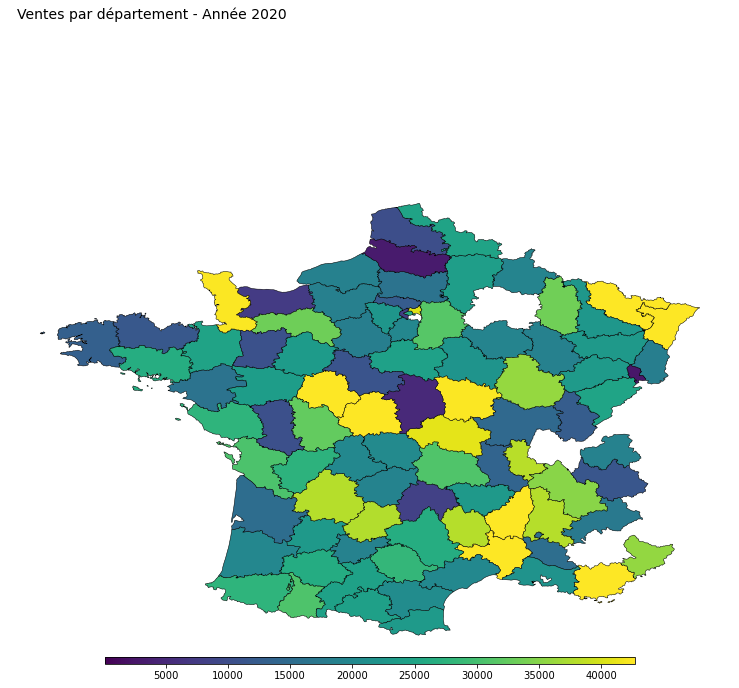

In [48]:
# Load file
geoData = gpd.read_file("datageojson.geojson")
# Merge the clean_dvf_2020 dataset with the geospatial information
df = pd.DataFrame(df2020.groupby(['Code departement']).size())
geoData = geoData.loc[geoData['code'] != '2A']
geoData = geoData.loc[geoData['code'] != '2B']
geoData['Code departement'] = geoData['code'].astype(float)
geoData = geoData.drop(['code'], axis = 1)
geoData.set_index('Code departement').sort_index()

df = df.drop([2.1,2.2,1.0,29,30], axis = 0)

geoData = geoData.drop([20.0, 57.0, 67.0, 68.0], axis = 0)
geoData["Nombre ventes"] = df[0].tolist()

fig, ax = plt.subplots(1, figsize=(13, 13))

# map departement with the right color:
geoData.plot(
    ax=ax,
    column="Nombre ventes", 
    cmap="viridis", 
    norm=plt.Normalize(vmin=102, vmax=42715),
    edgecolor='black', 
    linewidth=.5
);

# Remove useless axis
ax.axis('off');

# Add title
ax.annotate('Ventes par département - Année 2020', xy=(10,650),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=102, vmax=42715))
fig.colorbar(sm, orientation="horizontal", aspect=75, fraction=0.01, pad=0 );

## Conclusion 

On en conclue en comparant les donnée que la quantité de biens acheté en province pendant la periode du covid a Explosé. On peut l'interpreté comme une cause du confinement.